---
# Effectifs des médecins par régions de 2013 à 2015
---
## Groupe Zacharie Barbecot, Didier Bertille, Jérémie Chattou

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***
### Lecture des 3 jeux de données
1<sup>er</sup> fichier:  DensiteMedecins-2015.xlsx | 2<sup>ème</sup> fichier: DensiteMedecins-2014.xlsx | 3<sup>ème</sup> fichier: DensiteMedecins-2013.xlsx
***

In [2]:
dfile2015 = pd.read_excel("./DensiteMedecins-2015.xlsx", skiprows=5,encoding="utf-8")
dfile2014 = pd.read_excel("./DensiteMedecins-2014.xlsx", skiprows=5,encoding="utf-8")
dfile2013 = pd.read_excel("./DensiteMedecins-2013.xlsx", skiprows=5,encoding="utf-8")

In [3]:
data2015 = pd.DataFrame(dfile2015)
data2014 = pd.DataFrame(dfile2014)
data2013 = pd.DataFrame(dfile2013)


**1. Mise en forme des jeux de données ** 

Création de la colonne année


In [4]:
data2015[u"Année"] = 2015
data2014[u"Année"] = 2014
data2013[u"Année"] = 2013


**2. Récupération des colonnes intéressantes pour le jeu de données **

In [5]:
data_in2015 = data2015[['Zones inscription', u'Année', u'Médecine générale']]
data_in2014 = data2014[['Zones inscription', u'Année', u'Médecine générale']]
data_in2013 = data2013[['Zones inscription', u'Année', u'Médecine générale']]

***
### Mise en forme du graphique - Densité des médecins par région en 2013 -2015

Récupération des régions, trie dela densité de médécins par ordre décroissant, affichage d'un graphique avec bar horizontal.
***


** 1. Mise en place des données **

In [6]:
region2015 = data_in2015.iloc[2:28]
region2015sort = region2015.sort_values(u'Médecine générale')

region2014 = data_in2014.iloc[2:28]
region2014sort = region2014.sort_values(u'Médecine générale')

region2013 = data_in2013.iloc[2:28]
region2013sort = region2013.sort_values(u'Médecine générale')

In [7]:
width = 0.25
y_pos = range(len(region2015sort[u'Médecine générale']))
regions_label = region2015sort.iloc[0:,0]


** 2. Insertion d'un label associé à la valeur de densité pour la région. **


In [8]:
def autolabel(rects, name_color):
    # attach some text labels
    for rect in rects:
        xloc = rect.get_x()+ rect.get_width() + 2.0
        yloc = rect.get_y() + rect.get_height()/2.0
        label = ax.text(xloc, yloc, rect.get_width(), horizontalalignment='left',
                       verticalalignment='center', color=name_color, weight='bold', size=8,
                         clip_on=True)

** 3. Création et mise en forme du graphique **

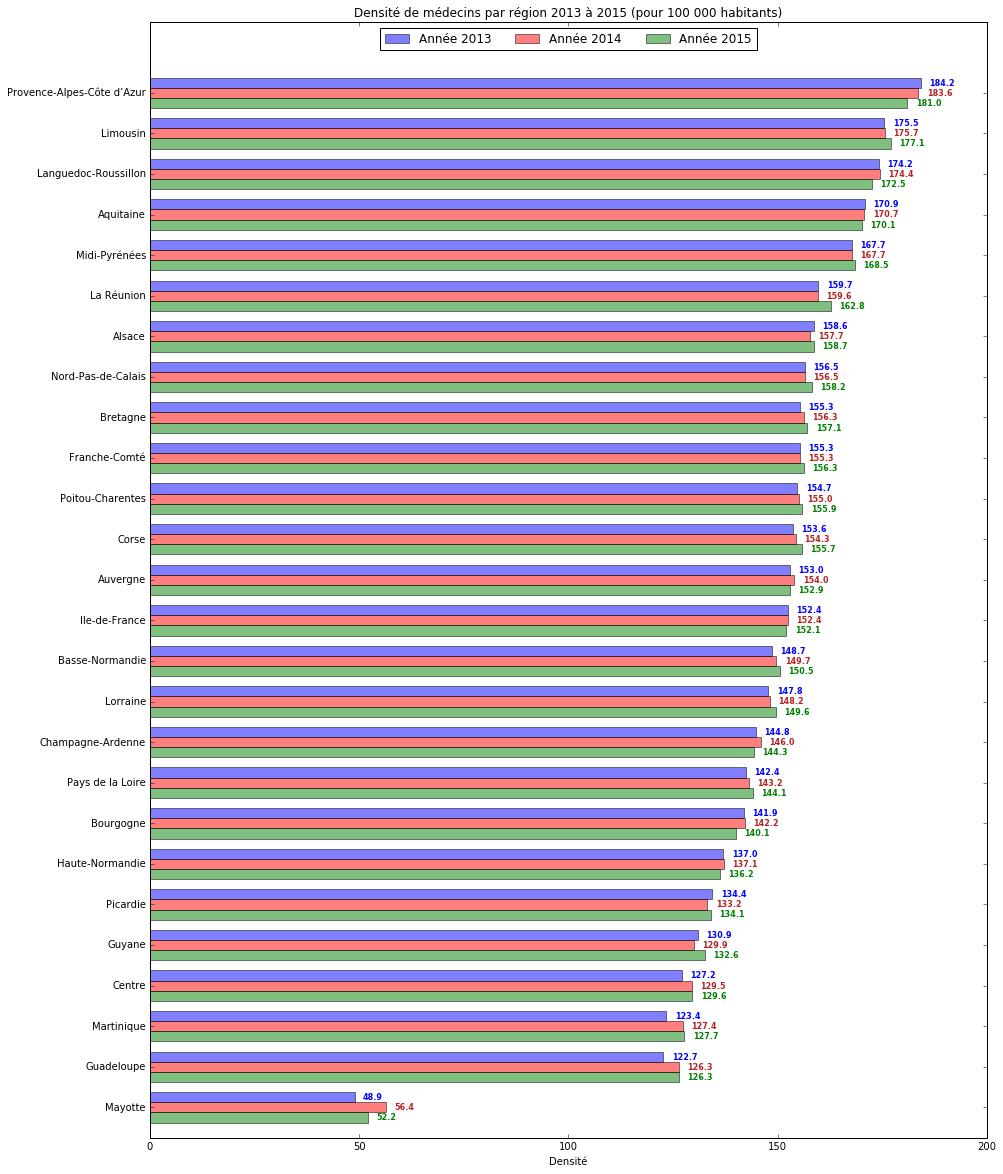

In [9]:
graph, ax = plt.subplots()

y_pos = np.arange(len(region2015sort[u'Médecine générale']))
rects1 = ax.barh(y_pos+0.5, region2013sort.iloc[0:,2], width, alpha=0.5, align='center', color='b')
rects2 = ax.barh(y_pos+0.25, region2014sort.iloc[0:,2], width, alpha=0.5, align='center', color='r')
rects3 = ax.barh(y_pos, region2015sort.iloc[0:,2], width, alpha=0.5, align='center', color='g')

# Propriétés du graphique (titre, ordonnées, abscisses, délimitation des valeurs affichées).
y_pos_label = y_pos + width
ax.set_xlabel(u'Densité')
ax.set_title(u'Densité de médecins par région 2013 à 2015 (pour 100 000 habitants)')
ax.set_yticks(y_pos_label)
ax.set_yticklabels(list(regions_label))
ax.set_ylim(-0.5,27)

# Ajout de la valeur correspondant à chaque bar.
autolabel(rects1, 'b')
autolabel(rects2, '#b22222')
autolabel(rects3, 'g')

ax.legend((rects1[0], rects2[0], rects3[0]), (u'Année 2013', u'Année 2014', u'Année 2015'), loc=9, ncol=3)

# Dimension du graphique.
graph.set_figheight(20)
graph.set_figwidth(15)
# Affichage du graphique.
plt.show()

***
### Création du jeu de données de l'année 2013 à 2015
Regroupements des 3 dataframes (jeu de données de 2013 à 2015).
***

In [42]:
# Concatènation de l'ensemble des 3 dataframes.
regions13_15=pd.concat([region2013, region2014, region2015]) 
regions13_15

,Zones inscription,Année,Médecine générale
2,Alsace,2013,159.7
3,Aquitaine,2013,170.9
4,Auvergne,2013,153.0
5,Basse-Normandie,2013,147.8
6,Bourgogne,2013,141.9
7,Bretagne,2013,155.3
8,Centre,2013,130.9
9,Champagne-Ardenne,2013,144.8
10,Corse,2013,152.4
11,Franche-Comté,2013,158.6


In [39]:
regions_clean = regions13_15.groupby([regions13_15[u'Zones inscription']])

In [41]:
regions_clean